In [133]:
### Resume Datatset

# Required libraries/ packages
import pandas as pd
import re
import textract
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report


In [134]:
df=pd.read_csv(r"C:\Users\acer\Downloads\UpdatedResumeDataSet.csv\UpdatedResumeDataSet.csv")

# dataset source https://www.kaggle.com/datasets/gauravduttakiit/resume-dataset

df.info() # nice, all non null
df['Category'].value_counts(normalize=True) # nt exactly suuuuper even but ok ah
# can prob replicate those ard 40> get each category to around 80?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


Category
Java Developer               0.087318
Testing                      0.072765
DevOps Engineer              0.057173
Python Developer             0.049896
Web Designing                0.046778
HR                           0.045738
Hadoop                       0.043659
Blockchain                   0.041580
ETL Developer                0.041580
Operations Manager           0.041580
Data Science                 0.041580
Sales                        0.041580
Mechanical Engineer          0.041580
Arts                         0.037422
Database                     0.034304
Electrical Engineering       0.031185
Health and fitness           0.031185
PMO                          0.031185
Business Analyst             0.029106
DotNet Developer             0.029106
Automation Testing           0.027027
Network Security Engineer    0.025988
SAP Developer                0.024948
Civil Engineer               0.024948
Advocate                     0.020790
Name: proportion, dtype: float64

In [135]:
up_df=pd.DataFrame(columns=['Category','Resume'])

for e in df['Category'].unique():
    cat=df[df['Category']==e]['Category']
    val_counts=cat.value_counts().values[0]
    up=80-val_counts
    if up<0:
        res=0 
    elif up>val_counts:
        res=val_counts 
    else:
        res=up
    for i,r in (df.iloc[(cat.sample(res).index)]).iterrows():
        up_df.loc[len(up_df)]=r

In [136]:
sample_df=pd.concat([df,up_df],axis=0)
sample_df['Category'].value_counts(normalize=True) # much more even distribution

Category
Java Developer               0.049065
Data Science                 0.046729
Blockchain                   0.046729
ETL Developer                0.046729
Hadoop                       0.046729
DevOps Engineer              0.046729
Python Developer             0.046729
Operations Manager           0.046729
HR                           0.046729
Testing                      0.046729
Sales                        0.046729
Mechanical Engineer          0.046729
Web Designing                0.046729
Arts                         0.042056
Database                     0.038551
Electrical Engineering       0.035047
Health and fitness           0.035047
PMO                          0.035047
Business Analyst             0.032710
DotNet Developer             0.032710
Automation Testing           0.030374
Network Security Engineer    0.029206
SAP Developer                0.028037
Civil Engineer               0.028037
Advocate                     0.023364
Name: proportion, dtype: float64

In [137]:
## Time to clean the dataset

# Analyse roles first > check if any overlap is present
sorted(sample_df['Category'].unique()) # unique, all single cat, no real overlap due to diff cases (Data Science vs data science)
# will leave category as it is

['Advocate',
 'Arts',
 'Automation Testing',
 'Blockchain',
 'Business Analyst',
 'Civil Engineer',
 'Data Science',
 'Database',
 'DevOps Engineer',
 'DotNet Developer',
 'ETL Developer',
 'Electrical Engineering',
 'HR',
 'Hadoop',
 'Health and fitness',
 'Java Developer',
 'Mechanical Engineer',
 'Network Security Engineer',
 'Operations Manager',
 'PMO',
 'Python Developer',
 'SAP Developer',
 'Sales',
 'Testing',
 'Web Designing']

In [149]:
sample_df['Resume'].head() # for some resumes, have odd symbols (â¢/â )
# could be due to diff encoding format; likely punctuation formats nt accepted
# also contain newline char that are unnecessary: will focus on alphabets and numbers

0    skills programming languages python pandas num...
1    education details may 2013 to may 2017 b e uit...
2    areas of interest deep learning control system...
3    skills r python sap hana tableau sap hana sql ...
4    education details mca ymcaust faridabad haryan...
Name: Resume, dtype: object

In [ ]:
sample_df['Resume']=sample_df['Resume'].apply(lambda x:str(' '.join(re.findall('[a-zA-Z0-9]+',x)).lower())) 
# get only letters and numbers; conver all to lowercase for standardization purposes
# will mean focus won't be on tokenizing sentences; rather more so on keyword id <Tf-IDF?>
# now will be to ID smth like common phrases/ words?
# but first > training and testing data

In [140]:
X_train,X_test,y_train,y_test = train_test_split(sample_df['Resume'],sample_df['Category'],stratify=sample_df['Category'],random_state=27)

<Axes: >

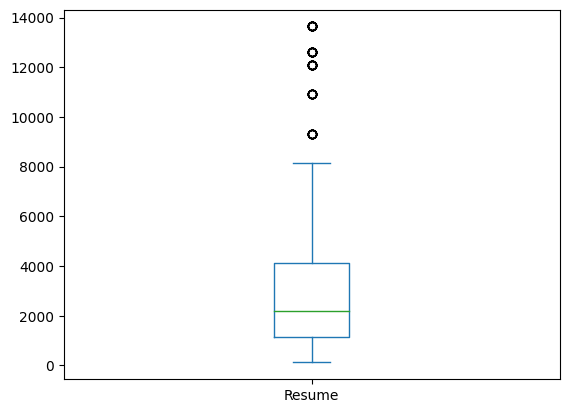

In [141]:
## NLTK > could look at TFIDF/ n-gram bag of words > key is to get smth dense; don't want a sparse vector for a model to be trained on
# have to consider fluff stop words as well > id only the key words; but for word2vec approach - overall meaning of sentences wld be useful

# speaking of

X_train.str.len().plot(kind='box') # q a large range, w decent number of outliers
# will monitor effect on dataset but for now will proceed with modelling

In [142]:
# as for creating vectors
vector=TfidfVectorizer(stop_words='english')
X_mod_train=vector.fit_transform(X_train)
X_mod_train.toarray().shape

(1284, 7333)

In [143]:
encoder = preprocessing.LabelEncoder()
y_mod_train=encoder.fit_transform(y_train)

In [144]:
clf = GradientBoostingClassifier(max_depth=1)
clf.fit(X_mod_train,y_mod_train)

GradientBoostingClassifier(max_depth=1)

In [145]:
X_mod_test=vector.transform(X_test)
y_mod_test=encoder.transform(y_test)

y_pred = clf.predict(X_mod_test)

In [146]:
print(classification_report(y_mod_test,y_pred,target_names=encoder.classes_)) # Insanely PERFECT!

                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00        10
                     Arts       1.00      1.00      1.00        18
       Automation Testing       1.00      1.00      1.00        13
               Blockchain       1.00      1.00      1.00        20
         Business Analyst       1.00      1.00      1.00        14
           Civil Engineer       1.00      1.00      1.00        12
             Data Science       1.00      1.00      1.00        20
                 Database       1.00      1.00      1.00        17
          DevOps Engineer       1.00      1.00      1.00        20
         DotNet Developer       1.00      1.00      1.00        14
            ETL Developer       1.00      1.00      1.00        20
   Electrical Engineering       1.00      1.00      1.00        15
                       HR       1.00      1.00      1.00        20
                   Hadoop       1.00      1.00      1.00     

In [152]:
raw_resume_1 = '''Hello there, my name is <name>. I am interested in this position, having had
significant experience in Python programming and SQL. I am also extremely familiar with Microsoft Excel and PowerBI.
I am currently an undergraduate of the National University of Singapore in Data Science and Analysis. 

I have
had prior experience in programming for 3 years and am familiar with most machine-learning models, ranging from
Logistic Regression Algorithms to Gradient Boosting Algorithms to Kmeans and Apriori algorithms. I have also had past experience
in working on a company's project related to Data Analysis'''

raw_resume_2 = '''Hello there, my name is <name>. I am interested in this position, having had
significant experience in Python programming for nearly 3 years. 

I am also extremely 
familiar with other programming languages
such as JavaScript and SQL, and am currently an undergraduate of the National University of Singapore in Data Science and Analytics.
I have coded my own personal projects in Python, ranging from Telegram Bots for ticketing systems to Image recognition software for 
outlining objects. While not having had any prior experience in a company positon, I believe that with my fervent desire in Python and 
the skills I have acquired over the years, I will be able to play a deep role in the positin offered.'''

def resume_predictor(raw_resume):
    resume_processed = ' '.join(re.findall('[a-zA-Z0-9]+',raw_resume)).lower()
    vec=vector.transform([resume_processed])
    return encoder.classes_[clf.predict(vec)[0]]

print('raw_resume_1 role prediction:',resume_predictor(raw_resume_1))
print('raw_resume_2 role prediction:',resume_predictor(raw_resume_2)) 
# NICE > especially considering relative similarity of resumes in terms of syntax structure and all

raw_resume_1 role prediction: Data Science
raw_resume_2 role prediction: Python Developer


In [148]:
# can even be tested out on files (word documents > .docx)
def resume_file_pred(file):
    text = textract.process(rf"{file}")
    return resume_predictor(text.decode("utf-8"))

# could prove useful in finetuning a resume to also fit a specific role (possibly)

# usefulness could be in analysing job resumes; 
# perhaps check if a person is suitable for the role he/she applied to
# or to even redirect person to another applicable role
# where his/her talents are more suitable